In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
#%config InlineBackend.figure_format = 'svg'

In [287]:
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),25,1)
dst = cv2.warpAffine(img,M,(cols,rows))

In [286]:
img = cv2.imread('/media/sf_TestImageDataBase/rectangle/jpeg_converted/LumbarSpine.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

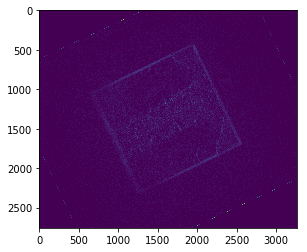

In [288]:
sobelx64f_y = cv2.Sobel(dst,cv2.CV_64F,1,0,ksize=1)
abs_sobel64f_y = np.absolute(sobelx64f_y)
sobel_8u_y = np.uint8(abs_sobel64f_y)
plt.imshow(sobel_8u_y)
plt.show()

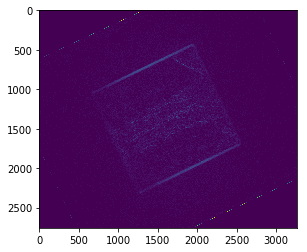

In [289]:
sobelx64f_x = cv2.Sobel(dst,cv2.CV_64F,0,1,ksize=1)
abs_sobel64f_x = np.absolute(sobelx64f_x)
sobel_8u_x = np.uint8(abs_sobel64f_x)
plt.imshow(sobel_8u_x)
plt.show()

In [290]:
minLineLength = 500
maxLineGap = 700

In [297]:
lines_x = cv2.HoughLinesP(sobel_8u_x, 5, np.pi/180,100,minLineLength,maxLineGap)


In [298]:
print(len(lines_x))

6


In [299]:
for line in lines_x:
    for x1,y1,x2,y2 in line:
        cv2.line(dst,(x1,y1),(x2,y2),(255,0,0),20)
        


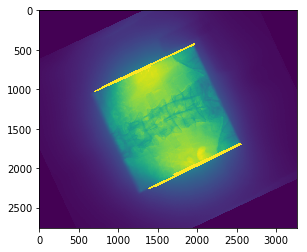

In [300]:
plt.imshow(dst)
plt.show()

In [312]:
lines_y = cv2.HoughLinesP(sobel_8u_y, 5, 1.2*np.pi/180,100,minLineLength,maxLineGap)


In [313]:
print(len(lines_y))

1


In [314]:
for line in lines_y:
    for x1,y1,x2,y2 in line:
        cv2.line(dst,(x1,y1),(x2,y2),(255,0,0),20)

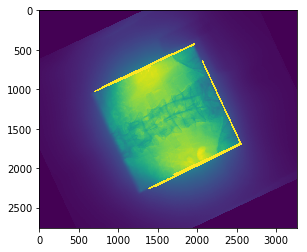

In [315]:
plt.imshow(dst)
plt.show()

In [ ]:
lines = cv2

In [4]:
edges = cv2.Canny(img, 30, 50)
point_list = []
for i, line in enumerate(edges):
    for j, pixel in enumerate(line):
        if(pixel > 10):
            point_list.append([i,j])
point_list = np.asarray(point_list)

In [5]:
edges = cv2.Canny(img, 30, 50)
asd = np.multiply(edges, edges > 10)

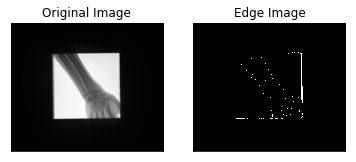

In [6]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
hull = ConvexHull(point_list)
hull.simplices

array([[ 5315, 25119],
       [29836,  6501],
       [31708, 28822],
       [26187, 25119],
       [   11,     0],
       [ 5899,  6501],
       [ 5899,  1759],
       [  781,  5315],
       [  781,   504],
       [32522, 32484],
       [27956, 28822],
       [ 1195,  1759],
       [ 1195,    11],
       [32440, 32484],
       [32440, 31427],
       [30540, 29836],
       [30540, 31427],
       [   10,     0],
       [   10,    31],
       [  295,   504],
       [  295,    31],
       [32130, 31708],
       [32130, 32522],
       [26452, 26187],
       [26679, 27956],
       [26679, 26452]], dtype=int32)

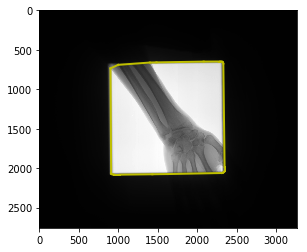

In [26]:
#plt.scatter(point_list[:,0], point_list[:,1])
for simplex in hull.simplices:
    plt.plot(point_list[simplex, 1], point_list[simplex, 0], 'k-', color='y', linewidth = 2)
plt.imshow(img, cmap = 'gray')
plt.show()

In [10]:
for simplex in hull.simplices:
    print

In [27]:
!pwd

/home/arnau/proyectito
